<a href="https://colab.research.google.com/github/mashdas/Deep_Learning_101/blob/master/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [0]:
df=pd.read_csv("Iris.csv",na_values=["NA","?"])
df

In [0]:
df.isnull().sum()

In [0]:
X,y=df.iloc[:,1:5],df.iloc[:,5]

In [0]:
y=pd.get_dummies(df["Species"])

In [0]:
X,y=X.values,y.values

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [39]:
##Building a NN
import tensorflow as tf
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras import Sequential


model=Sequential()
model.add(Dense(50,input_dim=X.shape[1],activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(y.shape[1],activation='softmax'))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
history=model.fit(X,y,verbose=1,epochs=40,validation_data=(X_test,y_test))

Epoch 1/40
5/5 [==============================] - 0s 23ms/step - loss: 1.1977 - accuracy: 0.1067 - val_loss: 1.0826 - val_accuracy: 0.5000
Epoch 2/40
5/5 [==============================] - 0s 7ms/step - loss: 1.0688 - accuracy: 0.5667 - val_loss: 0.9784 - val_accuracy: 0.7667
Epoch 3/40
5/5 [==============================] - 0s 7ms/step - loss: 0.9686 - accuracy: 0.6667 - val_loss: 0.8955 - val_accuracy: 0.7667
Epoch 4/40
5/5 [==============================] - 0s 8ms/step - loss: 0.8973 - accuracy: 0.6667 - val_loss: 0.8377 - val_accuracy: 0.7667
Epoch 5/40
5/5 [==============================] - 0s 7ms/step - loss: 0.8396 - accuracy: 0.6667 - val_loss: 0.7893 - val_accuracy: 0.8000
Epoch 6/40
5/5 [==============================] - 0s 7ms/step - loss: 0.7862 - accuracy: 0.7133 - val_loss: 0.7464 - val_accuracy: 0.9333
Epoch 7/40
5/5 [==============================] - 0s 7ms/step - loss: 0.7418 - accuracy: 0.8333 - val_loss: 0.7004 - val_accuracy: 0.9333
Epoch 8/40
5/5 [=================

In [0]:
def plot_lc(history,epochs):
  ##Accuracy
  epoch_range=range(1,epochs+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title("Model_accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.show()


   ##Loss
  epoch_range=range(1,epochs+1)
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title("Model_loss")
  plt.ylabel("Loss")
  plt.xlabel("Epoch")

  plt.legend(["Train","Val"],loc="upper left")
  plt.show()

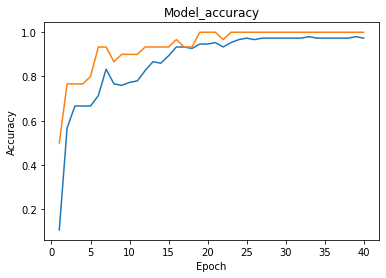

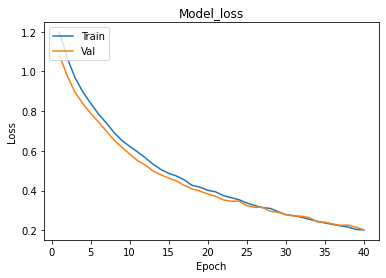

In [42]:
plot_lc(history,40)

In [0]:
##Doubt:SAME AS THE PREVIOS>>HERE ONLY 5 samples are used for training when 120 are available